### **Read Data**

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

data_root = './dataset'
data_path = os.path.join(data_root, 'churn_data_clean.csv')

df = pd.read_csv(data_path)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [2]:
df.shape

(10348, 27)

### **Split Data**
Split data into training, validation, testing set with ratio 7:1:2

In [3]:
X = df.loc[:, df.columns != 'Churn'] # Features
y = df.loc[:, df.columns == 'Churn'] # Target
print(X.shape)
print(y.shape)

(10348, 26)
(10348, 1)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

print('Training set: ', y_train.shape)
print('Validation set: ', y_val.shape)
print('Testing set: ', y_test.shape)

Training set:  (7243, 1)
Validation set:  (1035, 1)
Testing set:  (2070, 1)


In [5]:
X_train.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1939,1,0,0,1,1,1,0,0,0,0,0,0,0,1,21.050000,21.050000,0,0,1,1,0,0,0,0,0,1
2497,0,0,1,0,4,1,0,0,0,0,0,0,0,0,19.600000,93.450000,0,0,1,1,0,0,0,0,0,1
5222,0,0,0,0,8,1,1,1,1,1,0,0,0,1,65.500000,573.150000,1,0,0,1,0,0,1,0,0,0
7482,1,0,0,0,3,1,0,0,0,0,0,0,0,1,70.067047,233.635071,0,1,0,1,0,0,0,0,1,0
229,0,0,1,1,47,1,1,1,1,0,1,1,1,1,85.300000,4107.250000,1,0,0,0,0,1,0,1,0,0
4876,1,0,0,0,10,1,0,1,1,1,0,1,1,1,104.400000,1081.450000,0,1,0,1,0,0,0,0,1,0
2914,1,0,0,0,32,1,0,0,0,0,0,1,1,1,64.850000,2010.950000,1,0,0,0,1,0,1,0,0,0
68,0,0,1,1,50,1,0,0,0,0,0,0,0,0,20.150000,930.900000,0,0,1,0,0,1,1,0,0,0
7832,1,0,1,0,66,1,1,0,1,1,1,1,1,1,106.060504,7139.740286,0,1,0,0,1,0,0,0,1,0
7494,0,1,0,0,52,1,1,0,1,0,0,1,0,1,83.370580,4349.291005,0,1,0,1,0,0,0,0,1,0


In [6]:
X_val.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5853,1,0,1,0,62,1,1,1,1,0,0,0,1,0,96.100000,6001.450000,0,1,0,0,1,0,0,0,1,0
4882,0,0,0,0,66,0,0,1,1,1,1,1,1,1,62.500000,4136.400000,1,0,0,0,0,1,1,0,0,0
2414,0,0,1,0,25,1,0,0,0,0,0,0,0,1,20.200000,507.900000,0,0,1,0,1,0,1,0,0,0
5642,0,0,0,0,20,1,0,0,0,0,0,0,0,0,19.500000,403.150000,0,0,1,0,1,0,0,0,0,1
8623,1,0,0,0,2,1,0,0,0,0,0,0,0,1,44.767381,94.317657,1,0,0,1,0,0,0,0,1,0
1128,1,0,0,0,27,1,0,0,0,0,0,0,0,1,19.400000,529.800000,0,0,1,1,0,0,0,0,1,0
6990,1,0,1,0,36,1,0,1,0,0,0,1,1,1,93.600000,3366.050000,0,1,0,1,0,0,0,0,1,0
4849,1,0,0,0,41,0,0,0,0,1,0,1,1,1,51.350000,2075.100000,1,0,0,0,1,0,0,0,1,0
5744,1,1,1,0,40,1,0,0,0,0,0,0,1,0,55.800000,2283.300000,1,0,0,0,1,0,0,0,1,0
9067,1,0,0,0,55,1,0,1,1,0,0,0,0,1,40.541898,2106.960062,1,0,0,1,0,0,0,0,1,0


In [7]:
X_test.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
9428,1,0,0,0,47,1,1,0,0,1,0,1,1,1,93.853385,4506.133022,0,1,0,1,0,0,0,0,1,0
4593,0,0,0,0,11,1,0,0,0,0,0,0,0,0,20.300000,246.300000,0,0,1,1,0,0,1,0,0,0
5379,0,0,1,0,56,1,1,1,0,0,0,1,1,1,98.000000,5270.600000,0,1,0,0,1,0,0,0,1,0
8918,1,0,0,0,8,1,0,0,0,0,0,0,0,1,74.938341,631.572940,0,1,0,1,0,0,0,0,1,0
6448,1,0,0,0,58,1,1,0,0,1,1,1,1,1,104.650000,6219.600000,0,1,0,0,1,0,0,0,1,0
6060,0,1,0,0,8,1,0,0,1,0,0,1,0,1,87.100000,713.600000,0,1,0,1,0,0,0,0,1,0
850,0,0,1,1,72,1,1,1,1,1,1,1,1,1,115.800000,8476.500000,0,1,0,0,0,1,1,0,0,0
713,0,0,0,1,14,1,1,1,0,0,1,0,0,1,86.000000,1164.050000,0,1,0,1,0,0,0,0,0,1
8661,1,0,0,0,3,0,0,0,0,0,0,0,0,0,27.602254,74.301170,1,0,0,1,0,0,0,0,1,0
4438,1,0,1,1,51,1,1,0,0,0,0,0,0,1,24.950000,1222.250000,0,0,1,0,0,1,0,0,0,1


### **Normalization**

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

### **PCA**

In [9]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(X_train_normalized)
X_train_pca = pca.transform(X_train_normalized)
X_val_pca = pca.transform(X_val_normalized)
X_test_pca = pca.transform(X_test_normalized)

### **Load Models**

In [12]:
import joblib

# load bagging SVM model
bagging_svm = joblib.load('./models/bagging_svm.sav')
bagging_svm_tune = joblib.load('./models/bagging_svm_tune.sav')
bagging_svm_pca = joblib.load('./models/bagging_svm_pca.sav')
bagging_svm_pca_tune = joblib.load('./models/bagging_svm_pca_tune.sav')

# load gradient boosting dicision tree model
gbdt = joblib.load('./models/gbdt.sav')
gbdt_tune = joblib.load('./models/gbdt_tune.sav')
gbdt_pca = joblib.load('./models/gbdt_pca.sav')
gbdt_pca_tune = joblib.load('./models/gbdt_pca_tune.sav')

# load rf-adaboost model
rf_ada = joblib.load('./models/rf_ada.sav')
rf_ada_tune = joblib.load('./models/rf_ada_tune.sav')
rf_ada_pca = joblib.load('./models/rf_ada_pca.sav')
rf_ada_pca_tune = joblib.load('./models/rf_ada_pca_tune.sav')

d:\Anaconda\envs\keras\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Anaconda\envs\keras\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Anaconda\envs\keras\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.4.0 when using version 1.3.2. This might le

### **Evaluation**

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluation(result_df, models, loaded_models, test_data):
    for model_name, model in zip(models, loaded_models):
        y_pred = model.predict(test_data)
        accuracy = accuracy_score(y_test, y_pred) * 100
        precision = precision_score(y_test, y_pred) * 100
        recall = recall_score(y_test, y_pred) * 100

        result_df.loc[model_name] = [accuracy, precision, recall]

In [14]:
models = ['bagging_svm', 'bagging_svm_tune', 'gbdt', 'gbdt_tune', 'rf_ada', 'rf_ada_tune']
loaded_models_without_pca = [bagging_svm, bagging_svm_tune, gbdt, gbdt_tune, rf_ada, rf_ada_tune]

models_with_pca = ['bagging_svm_pca', 'bagging_svm_pca_tune', 'gbdt_pca', 'gbdt_pca_tune', 'rf_ada_pca', 'rf_ada_pca_tune'] 
loaded_models_with_pca = [bagging_svm_pca, bagging_svm_pca_tune, gbdt_pca, gbdt_pca_tune, rf_ada_pca, rf_ada_pca_tune]

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall']

# Dataframe to store results without PCA
results_df_without_pca = pd.DataFrame(index=models, columns=metrics)

# Dataframe to store results with PCA
results_df_with_pca = pd.DataFrame(index=models_with_pca, columns=metrics)


In [15]:
evaluation(results_df_without_pca,models,loaded_models_without_pca,X_test)
evaluation(results_df_with_pca,models_with_pca,loaded_models_with_pca,X_test_pca)

In [16]:
print("Results Without PCA:")
display(results_df_without_pca)

print("\nResults With PCA:")
display(results_df_with_pca)

Results Without PCA:


,Accuracy,Precision,Recall
bagging_svm,65.89372,68.421053,60.7245
bagging_svm_tune,82.705314,80.440529,87.035272
gbdt,82.801932,81.300813,85.795996
gbdt_tune,83.236715,81.6787,86.272641
rf_ada,84.444444,83.87698,85.795996
rf_ada_tune,84.057971,82.951421,86.272641



Results With PCA:


,Accuracy,Precision,Recall
bagging_svm_pca,82.415459,81.979458,83.698761
bagging_svm_pca_tune,82.125604,81.581395,83.603432
gbdt_pca,81.690821,80.733945,83.889418
gbdt_pca_tune,81.594203,80.530165,83.984747
rf_ada_pca,82.463768,83.627451,81.315539
rf_ada_pca_tune,83.188406,82.604651,84.65205


ROC Curve

In [17]:
from sklearn.metrics import roc_curve

pred_prob_bagging_svm_pca_tune = bagging_svm_pca_tune.predict_proba(X_test_pca)
pred_prob_gbdt_pca_tune = gbdt_pca_tune.predict_proba(X_test_pca)
pred_prob_rf_ada_pca_tune = rf_ada_pca_tune.predict_proba(X_test_pca)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_bagging_svm_pca_tune[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_gbdt_pca_tune[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_rf_ada_pca_tune[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)



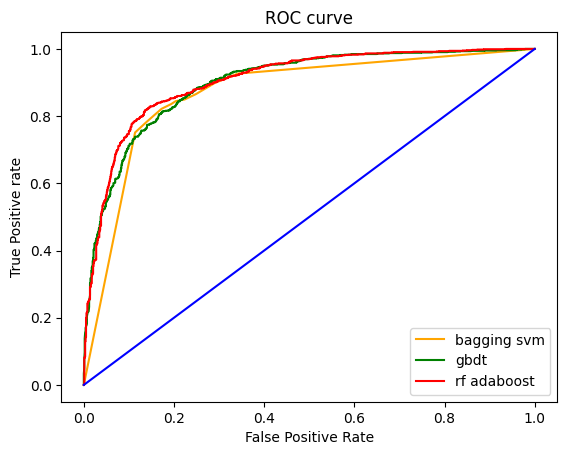

In [18]:
# plot roc curves
plt.plot(fpr1, tpr1, color='orange', label='bagging svm')
plt.plot(fpr2, tpr2, color='green', label='gbdt')
plt.plot(fpr3, tpr3, color='red', label='rf adaboost')
plt.plot(p_fpr, p_tpr,  color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [19]:
from sklearn.metrics import roc_auc_score

# auc scores
# auc_score_lr = roc_auc_score(y_test, pred_prob_lr_pca_tune[:,1])
auc_score_svm = roc_auc_score(y_test, pred_prob_bagging_svm_pca_tune[:,1])
auc_score_gdbt = roc_auc_score(y_test, pred_prob_gbdt_pca_tune[:,1])
auc_score_rf = roc_auc_score(y_test, pred_prob_rf_ada_pca_tune[:,1])

print("AUC Scores:")
# print("Logistic Regression (Tuned & PCA): ", auc_score1)
print("Bagging SVM (Tuned & PCA): ", auc_score_svm)
print("Gradient-Boosted Decision Tree (Tuned & PCA): ", auc_score_gdbt)
print("Random Forest-Adaboost (Tuned & PCA): ", auc_score_rf)

AUC Scores:
Bagging SVM (Tuned & PCA):  0.8711033968267899
Gradient-Boosted Decision Tree (Tuned & PCA):  0.8989336423196757
Random Forest-Adaboost (Tuned & PCA):  0.9062172919687516
